## Considera variáveis externas explicitamente
https://www.youtube.com/watch?v=pxd4ZzROqtI&list=PL5fQ3JoS0SZscDaHgXahtx632NMnq5RR-&index=8

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clima_india.csv', parse_dates=True, index_col='date')
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


<AxesSubplot:xlabel='date'>

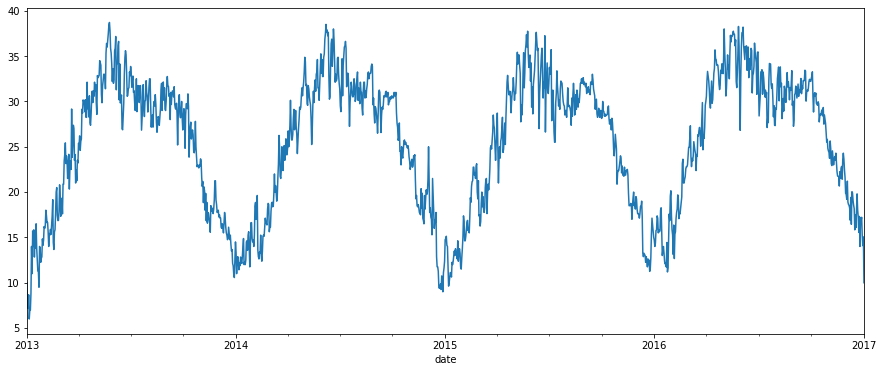

In [4]:
df.meantemp.plot(figsize=(15, 6))

In [9]:
p = 5
df1 = df[['meantemp']].copy()
for i in range(p):
    df1[f'x_{i + 1}'] = df1.meantemp.shift(i + 1)
df1.head()
df1.dropna(axis=0, inplace=True)
df1

,meantemp,x_1,x_2,x_3,x_4,x_5
date,,,,,,
2013-01-06,7.000000,6.000000,8.666667,7.166667,7.400000,10.000000
2013-01-07,7.000000,7.000000,6.000000,8.666667,7.166667,7.400000
2013-01-08,8.857143,7.000000,7.000000,6.000000,8.666667,7.166667
2013-01-09,14.000000,8.857143,7.000000,7.000000,6.000000,8.666667
2013-01-10,11.000000,14.000000,8.857143,7.000000,7.000000,6.000000
...,...,...,...,...,...,...
2016-12-28,17.217391,16.850000,17.142857,14.000000,17.318182,15.550000
2016-12-29,15.238095,17.217391,16.850000,17.142857,14.000000,17.318182
2016-12-30,14.095238,15.238095,17.217391,16.850000,17.142857,14.000000


In [12]:
X = df1.drop('meantemp', axis=1)
y = df1.meantemp

In [13]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(X,y)

DecisionTreeRegressor()

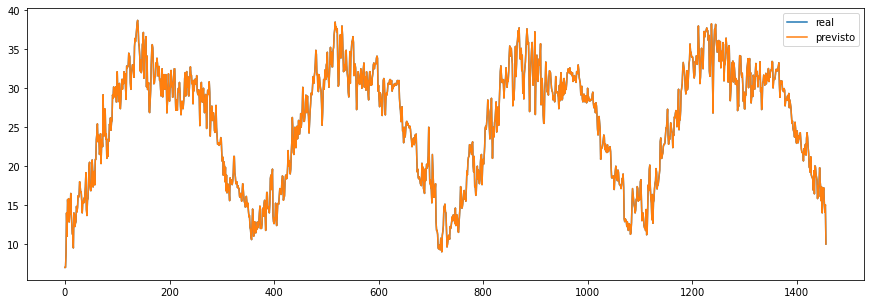

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(df1.meantemp.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

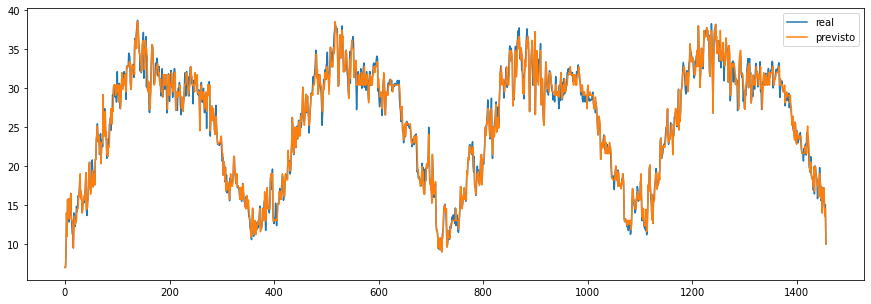

In [19]:
reg = DecisionTreeRegressor(max_depth=10)
reg.fit(X, y)
plt.figure(figsize=(15, 5))
plt.plot(df1.meantemp.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

In [21]:
# Adicionando a variável externa 'mês' ao Dataframe
df1['month'] = df1.index.month
df1.head()

,meantemp,x_1,x_2,x_3,x_4,x_5,month
date,,,,,,,
2013-01-06,7.000000,6.000000,8.666667,7.166667,7.400000,10.000000,1
2013-01-07,7.000000,7.000000,6.000000,8.666667,7.166667,7.400000,1
2013-01-08,8.857143,7.000000,7.000000,6.000000,8.666667,7.166667,1
2013-01-09,14.000000,8.857143,7.000000,7.000000,6.000000,8.666667,1
2013-01-10,11.000000,14.000000,8.857143,7.000000,7.000000,6.000000,1


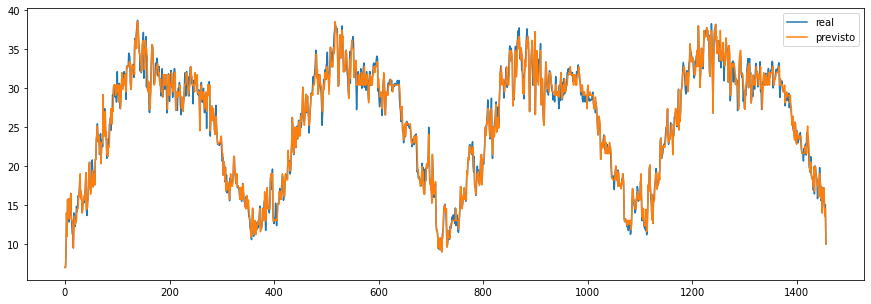

In [22]:
# Agora o modelo considera o mês na previsão (é possível adicionar quantas variávei externas quiser)
reg = DecisionTreeRegressor(max_depth=10)
reg.fit(X, y)
plt.figure(figsize=(15, 5))
plt.plot(df1.meantemp.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

In [25]:
# Validar o modelo com train/test
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=10)
reg.fit(X_train, y_train)

((y_test - reg.predict(X_test)) ** 2).mean()

4.813716907525828

In [26]:
p = 3
max_depth = 5

df1 = df[['meantemp']].copy()
for i in range(p):
    df1[f'x_{i+1}'] = df1.meantemp.shift(i + 1)
df1.dropna(axis=0, inplace=True)
df1['month'] = df1.index.month

X = df1.drop('meantemp', axis=1)
y = df1.meantemp
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=max_depth)
reg.fit(X_train, y_train)
((y_test - reg.predict(X_test)) ** 2).mean()

2.5256292946600856

In [27]:
df1.tail()

,meantemp,x_1,x_2,x_3,month
date,,,,,
2016-12-28,17.217391,16.850000,17.142857,14.000000,12
2016-12-29,15.238095,17.217391,16.850000,17.142857,12
2016-12-30,14.095238,15.238095,17.217391,16.850000,12
2016-12-31,15.052632,14.095238,15.238095,17.217391,12
2017-01-01,10.000000,15.052632,14.095238,15.238095,1


In [29]:
periodo_futuro = df1.index[-1] + np.timedelta64(1, 'D')
periodo_futuro

Timestamp('2017-01-02 00:00:00')

In [30]:
X_new = [list(np.flip(df1.meantemp.tail(p).values, axis=0)) + [periodo_futuro.month]]
X_new

[[10.0, 15.052631578947368, 14.095238095238097, 1]]

In [31]:
reg.predict(X_new)

array([11.37073171])